In [7]:
# @Author: Michael Haroon
# @Date: Sunday, June 25th 2023
# @Purpose: Generate all graphs per day instead of going to each separate file

#restraints of using code: assu es no sessions were deleted

In [8]:
from post_session_check_sync_pulses_ET_20221027 import render_sync_image
from plots import render_plots
from ibllib.io import raw_data_loaders
from IPython.display import Image, display
# from Analyze_all_sessions_from_server_mike import plot_avg
import os, time

In [9]:
m503 = 'MBOT77_503'
m505 = 'MBOT77_505'
m513 = 'MBOT77_513'
m777 = 'MBOT88_777'


In [15]:
subject = m513

2023-07-01


2023-07-04 02:33:10.56 WARNING  [raw_data_loaders.py:98] No data loaded: could not find raw data file


002


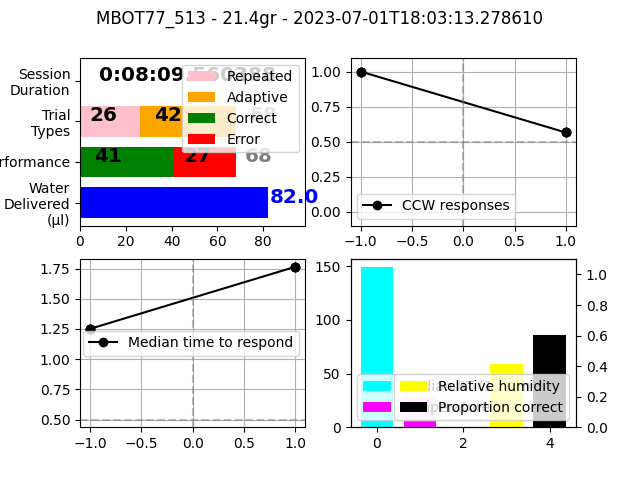

C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\pandas\core\reshape\merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


fraction correct for session was 0.6029411764705882
fraction correct for angle 0 = 1.0
fraction correct for angle 90 = 0.4


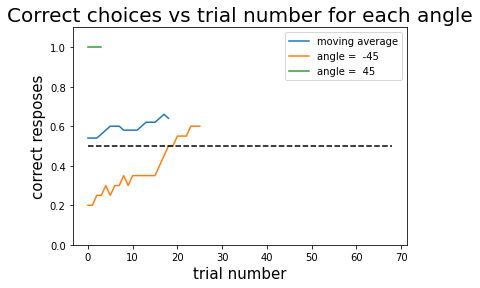


Percent Left Choices:
0.3382352941176471
Percent Absolute Bias:
0.16176470588235292
Found 0 trials with bad sync data for Box 1


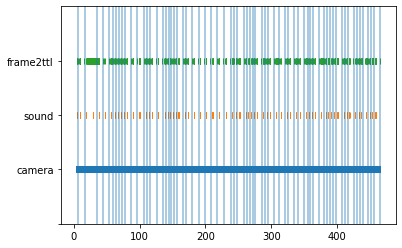

2023-07-04 02:33:10.978 WARNING  [raw_data_loaders.py:98] No data loaded: could not find raw data file
2023-07-04 02:33:10.987 WARNING  [raw_data_loaders.py:98] No data loaded: could not find raw data file





		-------------------------------------------
2023-07-02
004


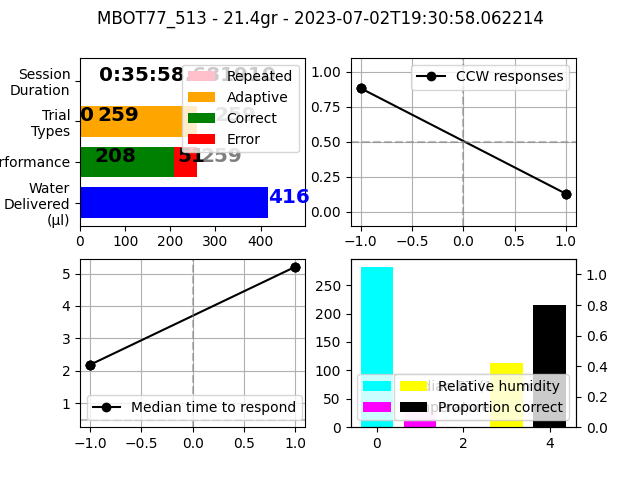

C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\pandas\core\reshape\merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


fraction correct for session was 0.803088803088803
fraction correct for angle 0 = 0.8814814814814815
fraction correct for angle 90 = 0.717741935483871


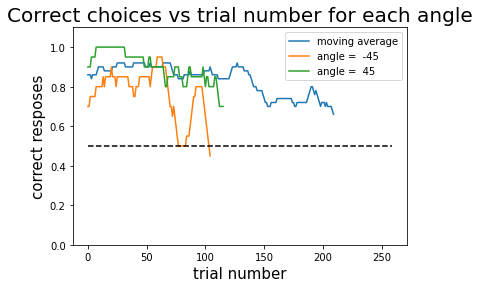


Percent Left Choices:
0.5212355212355212
Percent Absolute Bias:
0.021235521235521193
Found 0 trials with bad sync data for Box 1


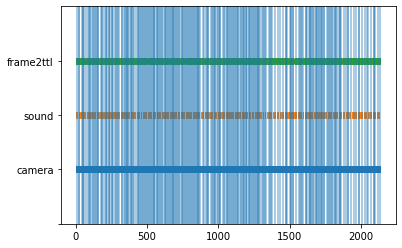




		-------------------------------------------
2023-07-03
003


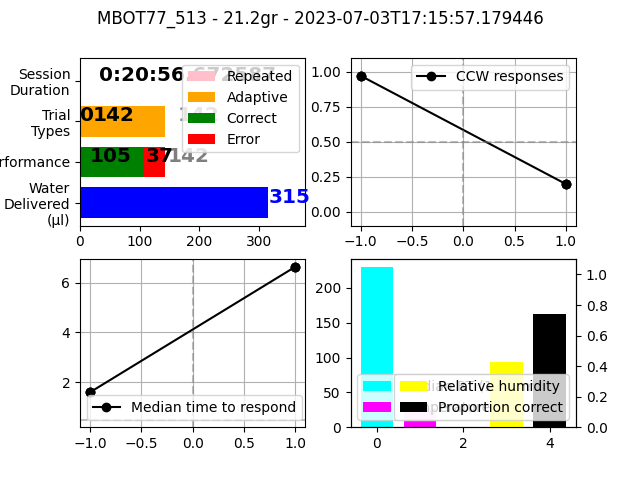

2023-07-04 02:33:13.185 WARNING  [raw_data_loaders.py:613] _iblrig_encoderPositions.raw.ssv rotary encoder timestamps swapped at index: 11464  Z:\moraogando\IBLdata\Current_Mice_(Mike)\MBOT77_513\2023-07-03\003\raw_behavior_data\_iblrig_encoderPositions.raw.ssv
C:\ProgramData\Anaconda3\envs\iblenv\lib\site-packages\pandas\core\reshape\merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


fraction correct for session was 0.7394366197183099
fraction correct for angle 0 = 0.9696969696969697
fraction correct for angle 90 = 0.5394736842105263


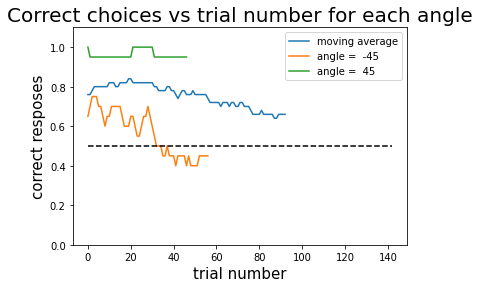


Percent Left Choices:
0.4647887323943662
Percent Absolute Bias:
0.03521126760563381
Found 0 trials with bad sync data for Box 1


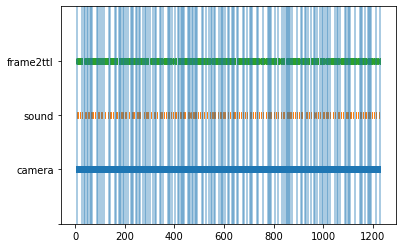




		-------------------------------------------
2023-07-04
2023-07-05
2023-07-06
2023-07-07
2023-07-08
2023-07-09


In [20]:

# iterate and render all images for each day in a range of days of month for only one subject
for day in range(1,30+1):
    session = ''
    date = '2023-07-'
    serverPath = r'Z:\moraogando\IBLdata\Current_Mice_(Mike)//'
    
    
    if day>9:
        date+=str(day)
    else:
        date= date + '0'+str(day)
        print(date)
    
    session_path = serverPath + subject+'//' + date
        
    
    if not os.path.exists(session_path):
        continue
    
    # check how many sessions (files) in that directory, if only one then session = that session
    list_of_sessions = next(os.walk(serverPath+subject+'//'+date))[1]
    number_of_sessions = len(list_of_sessions)
    size_of_longest_session = 1
    if number_of_sessions == 1:
        session+=list_of_sessions[0]
    else:
        #assign session to the longest session of that day
        for sesh in list_of_sessions:
            temp_path= session_path + '//' + sesh
            session_data = raw_data_loaders.load_data(temp_path)
            if session_data is None:
                continue
            session_size = len(session_data)
            
            if session_size > size_of_longest_session:
                session = sesh
                size_of_longest_session = session_size
                
    #render info
    print(session)
    # print(roe) add this function soon
    display(Image(filename=session_path+'//'+session+'//'+'raw_behavior_data//online_plot.png'))
    try:
        render_plots(date, subject, session)
    except:
        pass
    render_sync_image(date,subject,session)
    print('\n\n\n\t\t-------------------------------------------')